In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plato.planets.populations import PopulationModel
from plato.stars import filter_valid_targets

In [3]:
LOPS1 = pd.read_csv(
    "../data/processed/LOPS2_targets.csv",
    usecols=[
        "Radius",
        "Mass",
        "gaiaV",
        "[Fe/H]",
        "u1",
        "u2",
        "n_cameras",
        "Stellar Type",
        "Teff",
        "logg",
        "gaiaID_DR3",
    ],
)

LOPS1 = filter_valid_targets(LOPS1).rename(
    columns={"Radius": "R_star", "Mass": "M_star", "gaiaV": "Magnitude_V"}
)

In [4]:
LOPS1["sigma_star"] = 10e-6

In [5]:
o = PopulationModel(LOPS1, num_embryos=100)

In [6]:
t = o.create_mock_population()

In [7]:
s = o.create_mock_observation()

In [11]:
df = s
# Step 3: Define bins for the first two columns
bins1 = [0, 0.5, 2, 10, 20]  # Define bin edges for Column1
bins2 = [0, 0.5, 2, 10, 20]  # Define bin edges for Column2

# Step 4: Use pd.cut to bin the columns
df["R_bins"] = pd.cut(df["R_planet"], bins=bins1)
df["a_bins"] = pd.cut(df["a"], bins=bins2)

# Step 5: Group by the binned columns
grouped = df.groupby(["R_bins", "a_bins"])

# Step 6: Calculate the sum of the third column
result = grouped["detection_efficiency"].sum().reset_index()

result

/tmp/ipykernel_14086/2313312954.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["R_bins", "a_bins"])



,R_bins,a_bins,detection_efficiency
0,"(0.0, 0.5]","(0.0, 0.5]",8.751247e+00
1,"(0.0, 0.5]","(0.5, 2.0]",2.849765e-10
2,"(0.0, 0.5]","(2.0, 10.0]",0.000000e+00
3,"(0.0, 0.5]","(10.0, 20.0]",0.000000e+00
4,"(0.5, 2.0]","(0.0, 0.5]",3.382569e+03
5,"(0.5, 2.0]","(0.5, 2.0]",5.403889e+01
6,"(0.5, 2.0]","(2.0, 10.0]",0.000000e+00
7,"(0.5, 2.0]","(10.0, 20.0]",0.000000e+00
8,"(2.0, 10.0]","(0.0, 0.5]",3.709319e+03
9,"(2.0, 10.0]","(0.5, 2.0]",5.459645e+02


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (13).

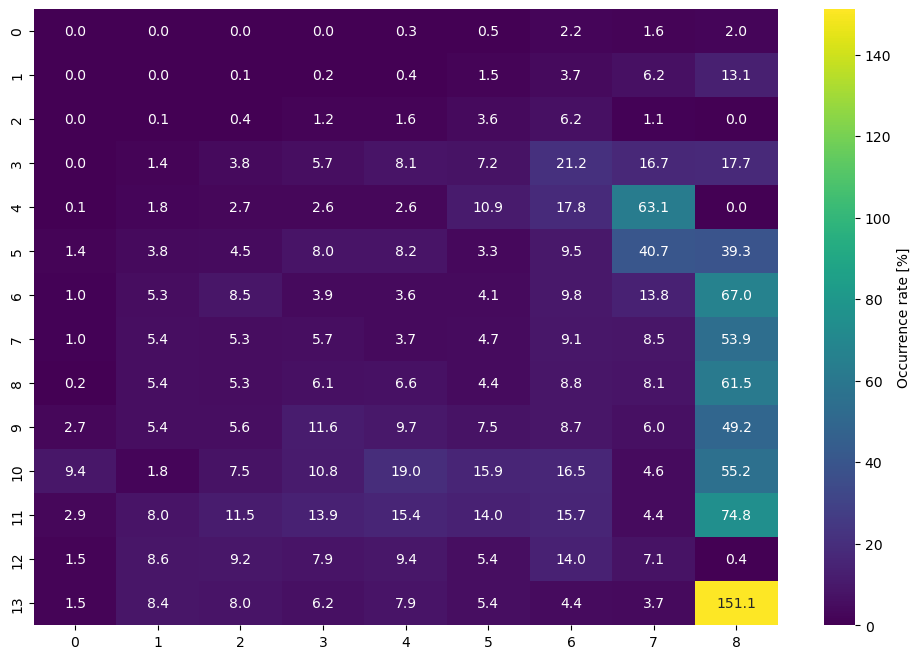

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data similar to the heatmap you provided
data = np.array(
    [
        [0.0, 0.0, 0.0, 0.0, 0.3, 0.5, 2.2, 1.6, 2.0],
        [0.0, 0.0, 0.1, 0.2, 0.4, 1.5, 3.7, 6.2, 13.1],
        [0.0, 0.1, 0.4, 1.2, 1.6, 3.6, 6.2, 1.1, 0.0],
        [0.0, 1.4, 3.8, 5.7, 8.1, 7.2, 21.2, 16.7, 17.7],
        [0.1, 1.8, 2.7, 2.6, 2.6, 10.9, 17.8, 63.1, 0.0],
        [1.4, 3.8, 4.5, 8.0, 8.2, 3.3, 9.5, 40.7, 39.3],
        [1.0, 5.3, 8.5, 3.9, 3.6, 4.1, 9.8, 13.8, 67.0],
        [1.0, 5.4, 5.3, 5.7, 3.7, 4.7, 9.1, 8.5, 53.9],
        [0.2, 5.4, 5.3, 6.1, 6.6, 4.4, 8.8, 8.1, 61.5],
        [2.7, 5.4, 5.6, 11.6, 9.7, 7.5, 8.7, 6.0, 49.2],
        [9.4, 1.8, 7.5, 10.8, 19.0, 15.9, 16.5, 4.6, 55.2],
        [2.9, 8.0, 11.5, 13.9, 15.4, 14.0, 15.7, 4.4, 74.8],
        [1.5, 8.6, 9.2, 7.9, 9.4, 5.4, 14.0, 7.1, 0.4],
        [1.5, 8.4, 8.0, 6.2, 7.9, 5.4, 4.4, 3.7, 151.1],
    ]
)

# Axis labels
x_labels = [0.5, 1, 2, 5, 10, 20, 50, 100, 500, 1000, 2000, 5000, 10000]
y_labels = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.75,
    2.0,
    2.25,
    2.5,
    3.0,
    4.0,
    6.0,
    8.0,
    12.0,
    16.0,
]

# Create a heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    cbar_kws={"label": "Occurrence rate [%]"},
)

# Set axis labels
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Rotate axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust the position of the axis labels to be at the edges of each box
ax.xaxis.tick_top()  # move x axis to the top
ax.xaxis.set_label_position("top")

plt.xlabel("Orbital Period [days]")
plt.ylabel("Planet Radius [RE]")
plt.title("Occurrence rates of population_ngpps")

plt.show()